In [100]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import ipyvolume as ipv

In [102]:
import kelp_compute
import kelp_analyze
import discrete_plot

In [103]:
import sqlite3
import shutil
import os

In [108]:
def cori_get_fd_grid_study_onespace_study_errors(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_onespace(db_path, study_name)
    )
    
    # TODO: Do plot, not just return errors
    #return ipv.quickvolshow(abs_err_arr),
    return abs_err_arr, rel_err_arr

In [130]:
abs_err_arr, rel_err_arr = cori_get_fd_grid_study_onespace_study_errors('gs64_nuc2200')

# FD vs. True ($b=0$)

## Converging

### TODO

## Non-converging

### TODO

##  $a_w \gg 1$

### TODO

# FD vs. FD ($b \neq 0$)

### TODO

## Compare two

abs_err = 5.909e-02
rel_err = 1.085e-02


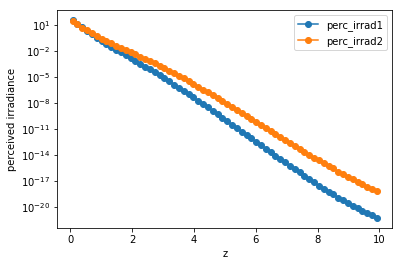

In [132]:
kelp_analyze.cori_plot_two_avg_irrads_onespace(
    'gs64_nuc2200',
    {'ns': 64, 'na': 10, 'fd_flag': True},
    {'ns': 64, 'na': 6, 'fd_flag': False},
)
plt.yscale('log')

## Two edges plot

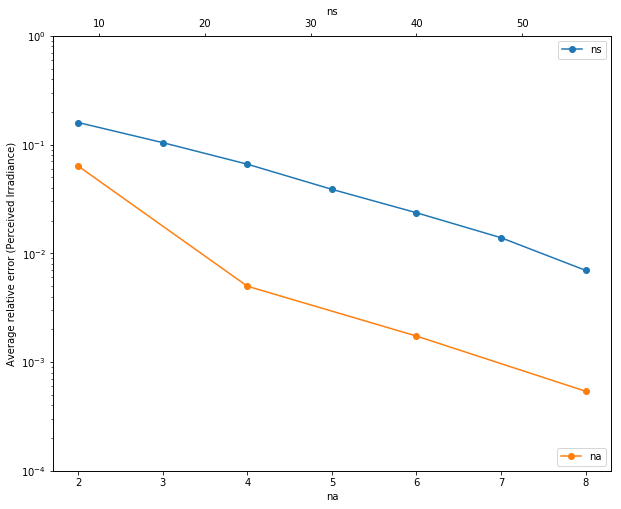

In [131]:
ns_list = np.arange(8, 65, 8)
na_list = np.arange(2, 11, 2)
plt.figure(figsize=(10,8))

ax1 = plt.gca()
ax1.semilogy(na_list, rel_err_arr[-1,:], 'C1o-', label='na')
ax1.set_xlabel('na')
plt.legend(loc='lower right')

ax2 = plt.twiny()
ax2.semilogy(ns_list, rel_err_arr[:,-1], 'C0o-', label='ns')
ax2.set_xlabel('ns')
plt.legend(loc='upper right')


plt.ylim(1e-4, 1e0)
ax1.set_ylabel('Average relative error (Perceived Irradiance)')
plt.show()

## Full 2D resolution grid

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


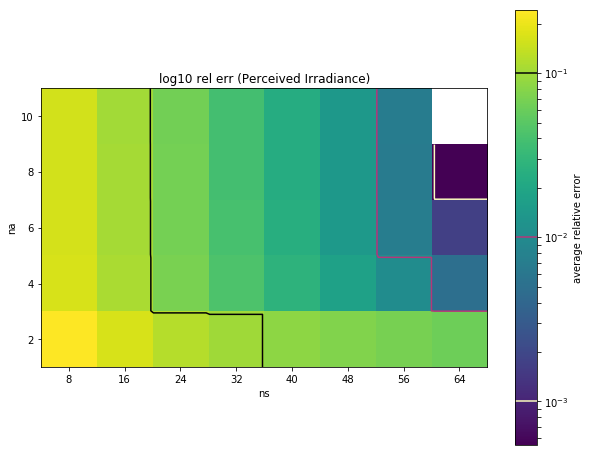

In [162]:
ns_list = np.arange(8, 65, 8)
na_list = np.arange(2, 11, 2)

# ns max
plt.figure(figsize=(10,8))
ax = plt.gca()
plt.title('log10 rel err (Perceived Irradiance)')
rel_err_ns_plane = rel_err_arr
discrete_plot.imshow_with_contours_and_zoom(
    ns_list, 
    na_list, 
    rel_err_ns_plane, 
    zoom_factor=4,
    imshow_kwargs={
        'norm': LogNorm()
    },
    contour_kwargs={
        'levels': None, #np.logspace(-3,0,7),
        'norm': LogNorm()
    },
    cbar_kwargs={
        'label': 'average relative error'
    }
    
)
plt.xlabel('ns')
plt.ylabel('na')
ax.set_aspect(4)
plt.show()

# FD vs. FD ($b \gg 1$)

## Compare two

### TODO

## Two edges plot

### TODO

## Full 2D resolution grid

### TODO